In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from plotnine import * 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score


**PART ONE**

In [2]:
#look at data
df = pd.read_csv("insurance_costs_1.csv")
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


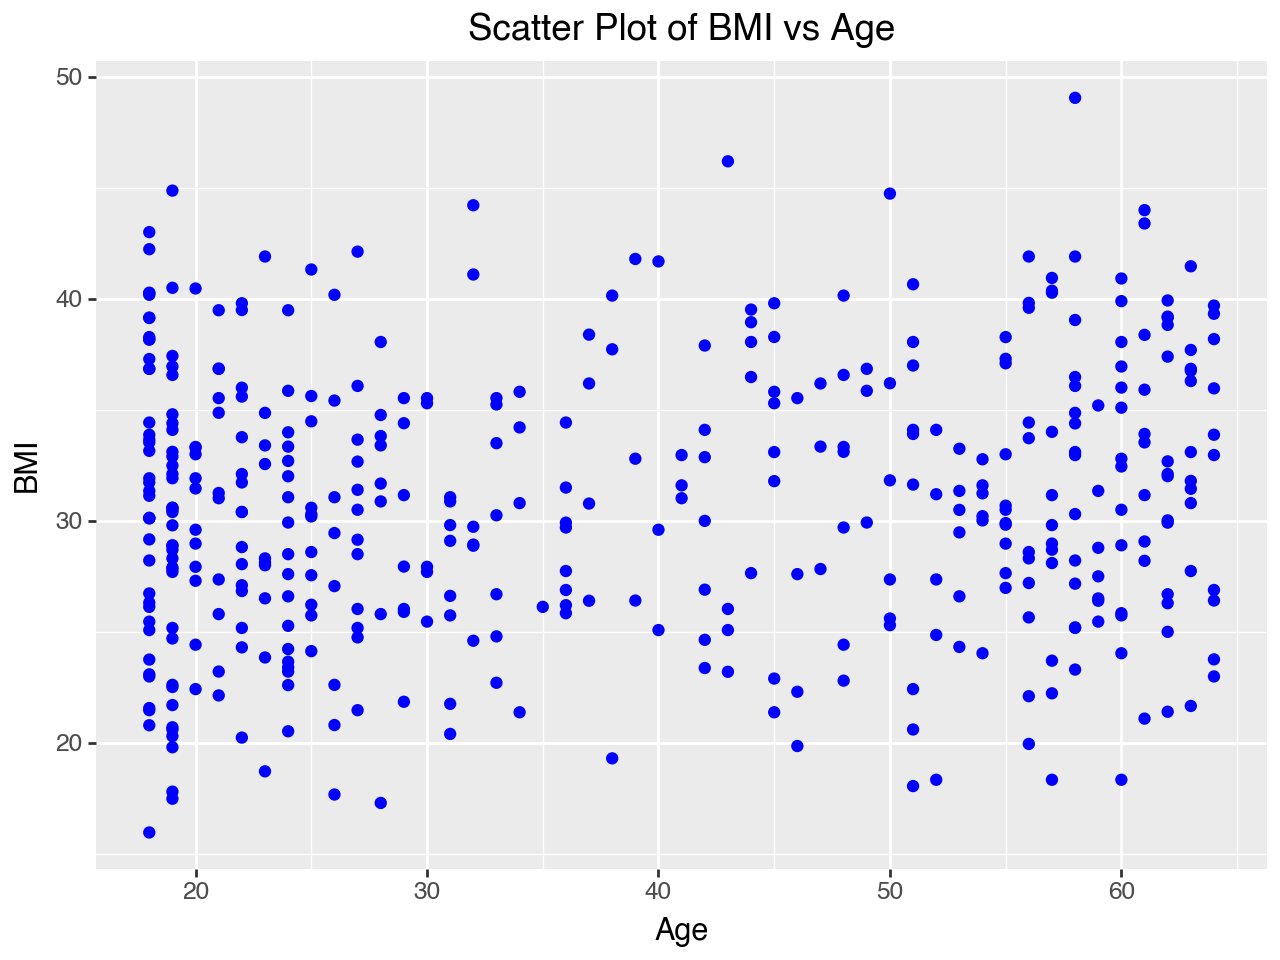

In [3]:
#summarize data in plot
(ggplot(df,aes(x="age", y="bmi"))
+geom_point(color='blue') +
    labs(title='Scatter Plot of BMI vs Age', x='Age', y='BMI')
)


In [4]:
#summarize data 
#find mean

mean_bmi = df["bmi"].mean()
mean_age = df["age"].mean()
mean_charges = df["charges"].mean()

print(mean_bmi)
print(mean_age)
print(mean_charges)

30.768897911832948
37.96055684454756
12297.098118187932
30.768897911832948
37.96055684454756
12297.098118187932


In [5]:
df.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [6]:
#summarize data 
print("There are", df[df["sex"]=='female'].shape[0],"females in the data")
print("There are", df[df["sex"]=='male'].shape[0],"females in the data")

There are 225 females in the data
There are 206 females in the data
There are 225 females in the data
There are 206 females in the data


In [7]:
#Make dummy variables for female  and change smoker 
df['female']=(df['sex']=='female').astype(int)
df['yes_smoker']=(df['smoker']=='yes').astype(int)
df.head()

,age,sex,bmi,smoker,region,charges,female,yes_smoker
0,19,female,27.900,yes,southwest,16884.92400,1,1
1,33,male,22.705,no,northwest,21984.47061,0,0
2,32,male,28.880,no,northwest,3866.85520,0,0
3,31,female,25.740,no,southeast,3756.62160,1,0
4,60,female,25.840,no,northwest,28923.13692,1,0


Make 3 plots:

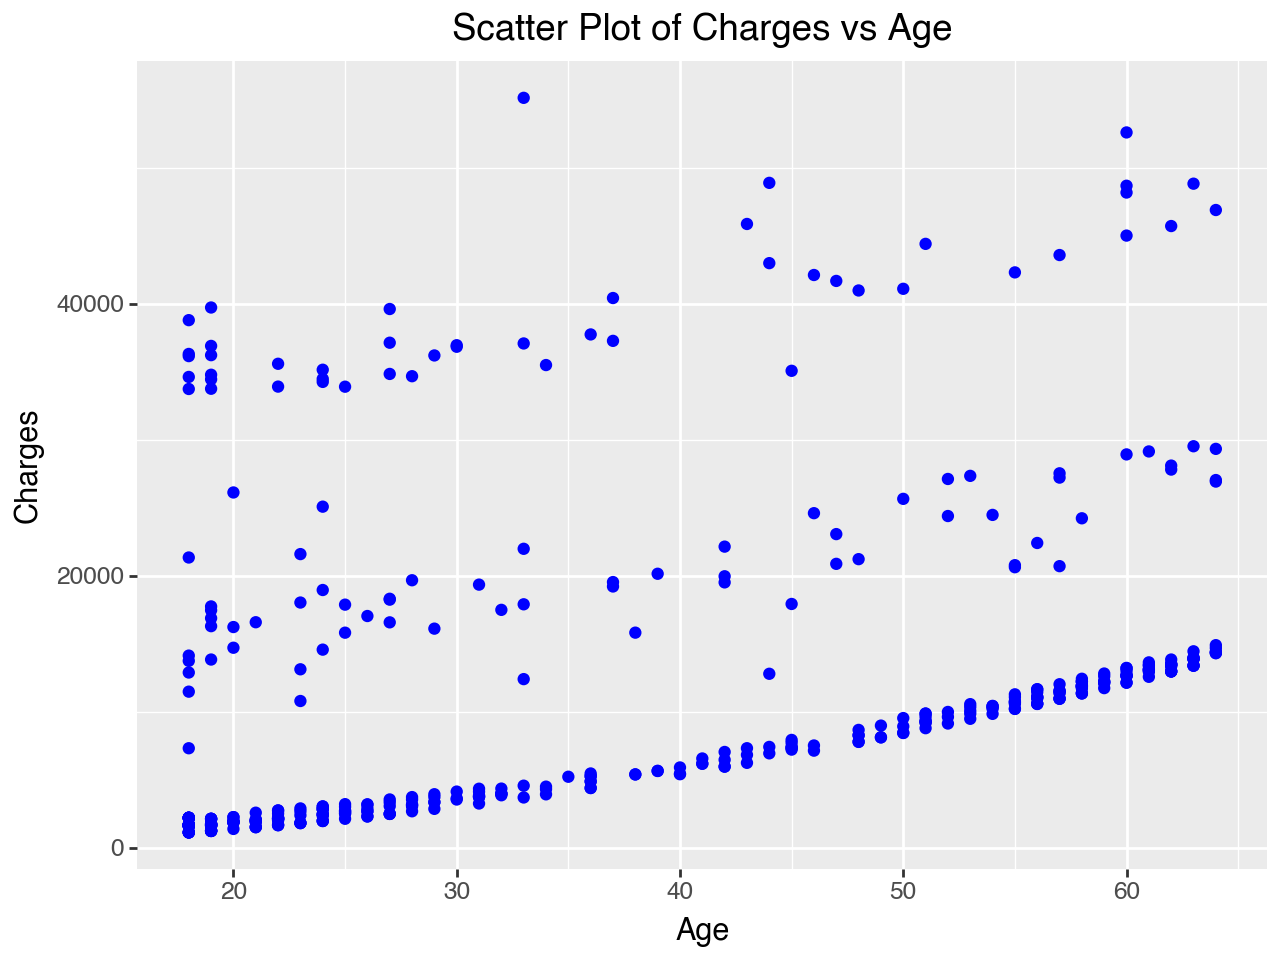

In [8]:
#Age
(ggplot(df,aes(x="age", y="charges"))
+geom_point(color='blue') +
    labs(title='Scatter Plot of Charges vs Age', x='Age', y='Charges')
)

We can see in this graph that there is a trend that an increase in age results in an increase in charge, however there are outliers at every stage. 

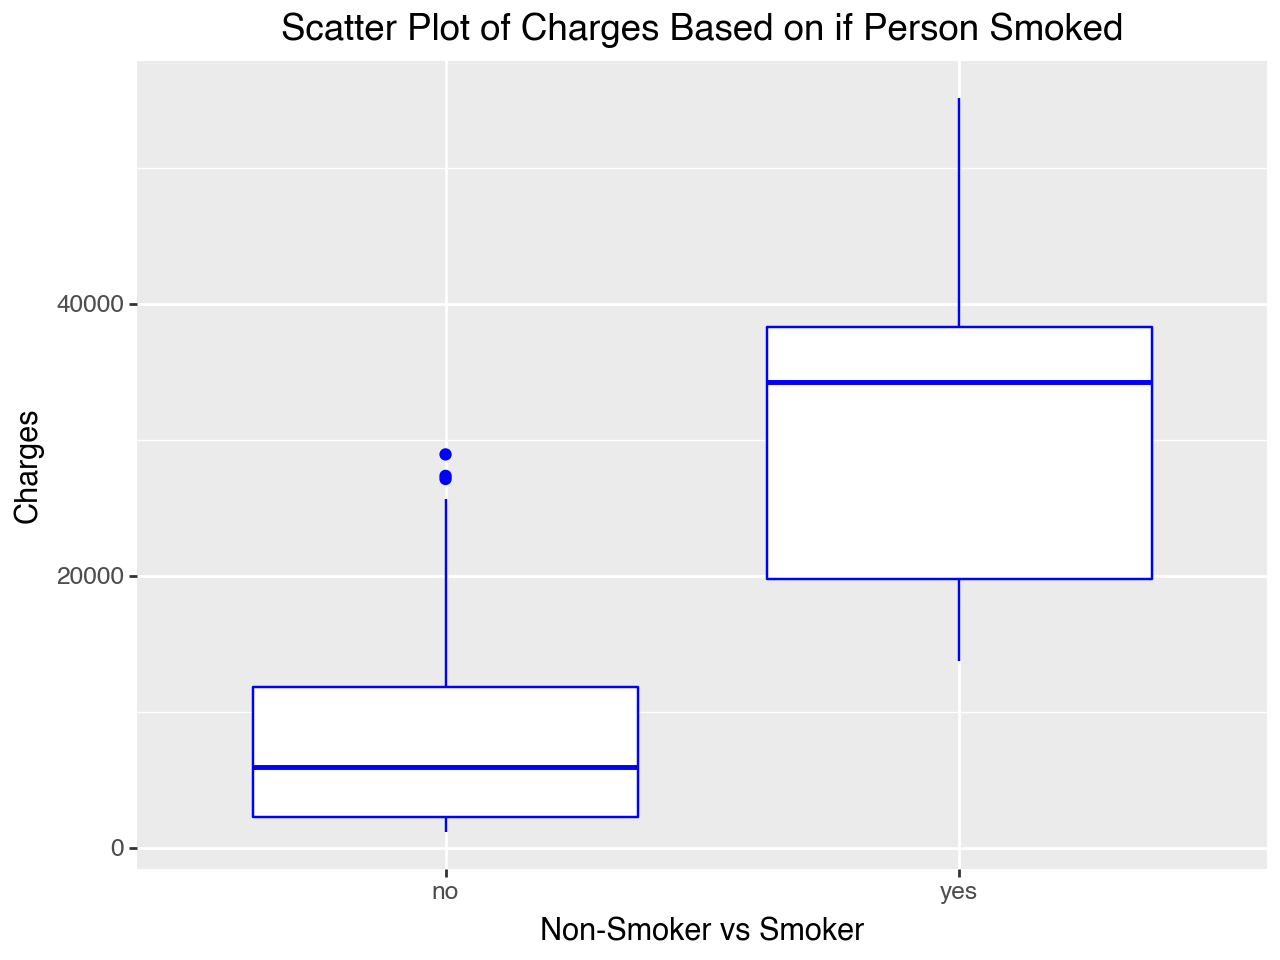

In [9]:
(ggplot(df,aes(x="smoker", y="charges"))
+geom_boxplot(color='blue') 
+labs(title='Scatter Plot of Charges Based on if Person Smoked', x='Non-Smoker vs Smoker', y='Charges')

)

In this box plot we can easily see that there is a higher mean and range of charges if a person smoked. 

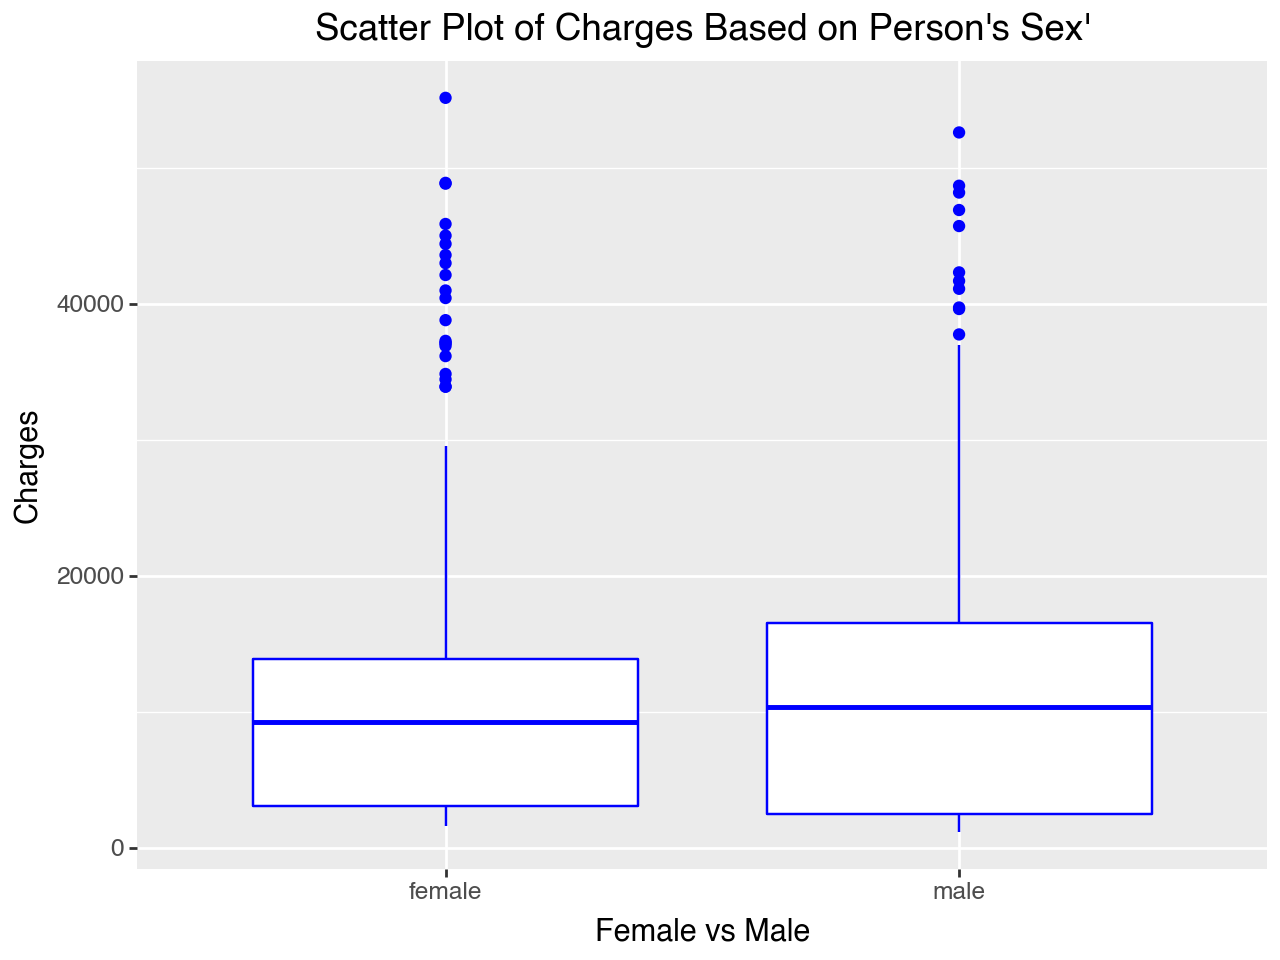

In [10]:
#Sex
(ggplot(df,aes(x="sex", y="charges"))
+geom_boxplot(color='blue') 
+labs(title="Scatter Plot of Charges Based on Person's Sex'", x='Female vs Male', y='Charges')
)

This graph shows that while the mean charges for male and females are similar, males have a wider range of charges and a higher max. Both have a lot of outliers.

# Part Two 


In [11]:
#Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.
#create training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [12]:
X = df.drop("charges", axis = 1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
from sklearn.compose import make_column_selector, ColumnTransformer

In [14]:
#Q1
#model 1 
np.random.seed(123)
#X = age, y = charges

#column transform 
ct1 = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age"])
    ],
    remainder="drop"
)

#create a pipeline
pipeline1 = Pipeline ([
    ('preprocessing', ct1),
    ('linear regression',LinearRegression()),
]).set_output(transform="pandas")

#fit the data
fitted_model1 = pipeline1.fit(X_train, y_train)
ytrain_preds_1 = fitted_model1.predict(X_train)
ytest_preds_1 = fitted_model1.predict(X_test)

mse_1 = mean_squared_error(y_test, ytest_preds_1)
r2_1 = r2_score(y_test, ytest_preds_1)
coef_1 = pipeline1['linear regression'].coef_
intercept_1 = pipeline1['linear regression'].intercept_

print("The MSE is",mse_1)
print("The R squared is",r2_1)
print("The slope is",coef_1)
print("The intercept is",intercept_1)

The MSE is 157793108.2051795
The R squared is 0.11146715152356468
The slope is [3438.90907376]
The intercept is 12174.665320739938
The MSE is 157793108.2051795
The R squared is 0.11146715152356468
The slope is [3438.90907376]
The intercept is 12174.665320739938


There is a very large MSE which means that age can not predict the charges accurately.The rsquared is also very low, which is not good. It shows that about 10% of the variance can be explained by the model. The slope is 235 meaning as age goes up by 1 year, the charges go up by about $222. At 0 years old, the charges start at about $4130. 

In [15]:
#model 2: x= age and sex, y = charges 
np.random.seed(123)

#column 
ct2 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
  ],
  remainder = "drop"
)

#create pipeline 2
pipeline2 = Pipeline ([
     ("preprocessing", ct2),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model2 = pipeline2.fit(X_train, y_train)
ytest_pred_2 = fitted_model2.predict(X_test)

mse_2 = mean_squared_error(y_test, ytest_pred_2)
r2_2 = r2_score(y_test, ytest_pred_2)


print("The MSE is",mse_2)
print("The R squared is",r2_2)


The MSE is 157578801.31289944
The R squared is 0.11267391343865518
The MSE is 157578801.31289944
The R squared is 0.11267391343865518


In [16]:
#model 3: x = age and smoker, y = charges
np.random.seed(123)
#column 
ct3 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
  ],
  remainder = "drop"
)

#create pipeline 3
pipeline3 = Pipeline ([
    ("standardize", ct3),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model3 = pipeline3.fit(X_train, y_train)
ytest_pred_3 = fitted_model3.predict(X_test)

mse_3 = mean_squared_error(y_test, ytest_pred_3)
r2_3 = r2_score(y_test, ytest_pred_3)


print("The MSE is",mse_3)
print("The R squared is",r2_3)


The MSE is 53232879.81912256
The R squared is 0.700245702259789
The MSE is 53232879.81912256
The R squared is 0.700245702259789


It appears that smoker was a better predictor than sex because model 3 had a higher r squared and lower MSE value than my model 2(with sex). 
MSE: 43,504,816<130,620,794
Rsquared: 0.6766149374318247> -0.02230830201085121

# PART 3

### 1.Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [17]:
#1
np.random.seed(123)
#model with age and bmi

#column 
ct4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bmi", "age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline4 = Pipeline ([
    ("standardize", ct4),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model4 = pipeline4.fit(X_train, y_train)
ytest_pred_4 = fitted_model4.predict(X_test)

mse_4 = mean_squared_error(y_test, ytest_pred_4)
r2_4 = r2_score(y_test, ytest_pred_4)

print("The MSE is",mse_4)
print("The R squared is",r2_4)


The MSE is 151923952.54966837
The R squared is 0.14451636167006787
The MSE is 151923952.54966837
The R squared is 0.14451636167006787


**How does the MSE compare to the model in Part Two Q1? MSE?**

The MSE is lower in this model than the one in part two. This model also has a higher rsquared (0.13828533502135465 <0.10371718364666094). This is probably due to more variables leading to better predictions. 

### 2. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [18]:
#2: age squared
np.random.seed(123)

ct5 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("poly_age", PolynomialFeatures(2), ["age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline5 = Pipeline ([
     ("standardize", ct5),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model5 = pipeline5.fit(X_train, y_train)
ytest_pred_5 = fitted_model5.predict(X_test)

mse_5 = mean_squared_error(y_test, ytest_pred_5)
r2_5 = r2_score(y_test, ytest_pred_5)


print("The MSE is",mse_5)
print("The R squared is",r2_5)


The MSE is 158829195.91904846
The R squared is 0.10563294255115285
The MSE is 158829195.91904846
The R squared is 0.10563294255115285


**How do the MSE and R-squared compare to the model in P2 Q1?**
The MSE went up in this model and the rsquared is higher in the old model(.10371718364666094 >0.08224081061386213). This implied that age squared is not helpful. 

### 3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [19]:
#3: Poly nominal 4
np.random.seed(123)

ct6 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("poly_age", PolynomialFeatures(4), ["age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline6 = Pipeline ([
     ("standardize", ct6),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model6 = pipeline6.fit(X_train, y_train)
ytest_pred_6 = fitted_model6.predict(X_test)

mse_6 = mean_squared_error(y_test, ytest_pred_6)
r2_6 = r2_score(y_test, ytest_pred_6)


print("The MSE is",mse_6)
print("The R squared is",r2_6)

The MSE is 156346234.56996217
The R squared is 0.11961449564466176
The MSE is 156346234.56996217
The R squared is 0.11961449564466176


This model has a really low r squared. It was even lower than the orginial.  (-0.0066846498291079914<0.08224081061386213)

### 4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [20]:
#4: Poly nominal 12
np.random.seed(123)

ct7 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("poly_age", PolynomialFeatures(12), ["age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline7 = Pipeline ([
     ("standardize", ct7),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model7 = pipeline7.fit(X_train, y_train)
ytest_pred_7 = fitted_model7.predict(X_test)

mse_7 = mean_squared_error(y_test, ytest_pred_7)
r2_7 = r2_score(y_test, ytest_pred_7)


print("The MSE is",mse_7)
print("The R squared is",r2_7)

The MSE is 162043392.40277258
The R squared is 0.08753380508101205
The MSE is 162043392.40277258
The R squared is 0.08753380508101205


**5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?**

I believe that the best model is

### 5. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

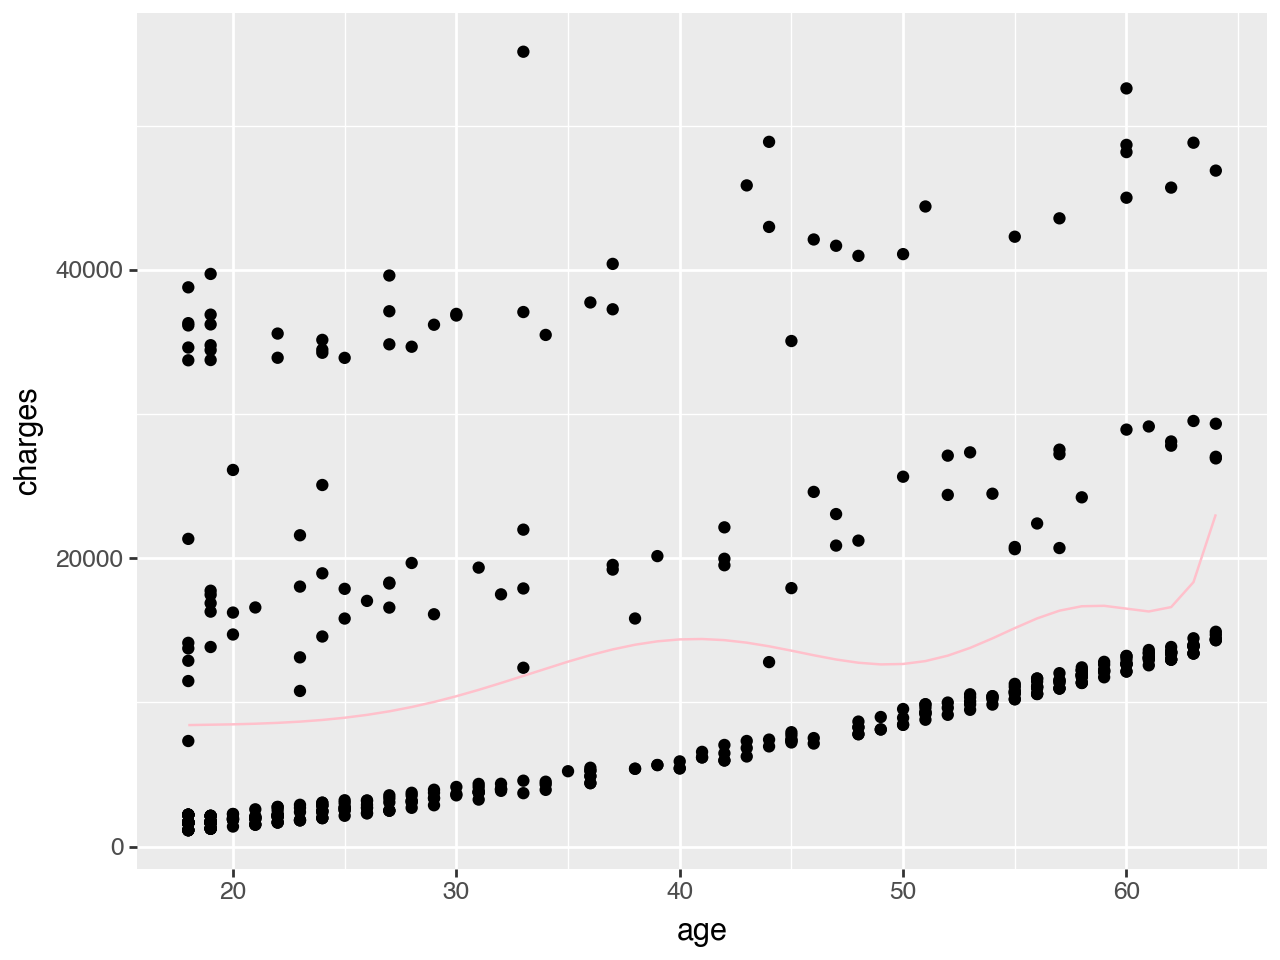

In [21]:
#save predictions of x
full_pred = fitted_model7.predict(X)

#plot scatter
(ggplot(df, aes(x="age", y="charges"))
+geom_point()
+geom_line(aes(y=full_pred),color = "pink")
)

It appears that model may be slightly over fitting the original data. 

# Part Four: New Data

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [22]:
test = pd.read_csv("insurance_costs_2.csv")

In [23]:
#create dummies 
test['female']=(test['sex']=='female').astype(int)
test['yes_smoker']=(test['smoker']=='yes').astype(int)
test.head()

,age,sex,bmi,smoker,region,charges,female,yes_smoker
0,23,male,34.400,no,southwest,1826.84300,0,0
1,56,male,40.300,no,southwest,10602.38500,0,0
2,18,male,34.100,no,southeast,1137.01100,0,0
3,63,female,23.085,no,northeast,14451.83515,1,0
4,63,male,28.310,no,northwest,13770.09790,0,0


In [24]:
#Set new data
X_train= df.drop("charges", axis=1)
X_test= test.drop("charges", axis=1)
y_train = df[["charges"]]
y_test= test[["charges"]]

In [25]:
#Model 1: age

#column 
ct8 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
  ],
  remainder = "drop"
)

#create pipeline 8
pipeline8 = Pipeline ([
     ("preprocessing", ct8),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model8 = pipeline8.fit(X_train, y_train)
ytest_pred_8 = fitted_model8.predict(X_test)

mse_8 = mean_squared_error(y_test, ytest_pred_8)
r2_8 = r2_score(y_test, ytest_pred_8)


print("The MSE is",mse_8)
print("The R squared is",r2_8)


The MSE is 136077136.50195494
The R squared is 0.12236515675533055
The MSE is 136077136.50195494
The R squared is 0.12236515675533055


In [26]:
#Model 2: age and bmi

#column 
ct9 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
  ],
  remainder = "drop"
)

#create pipeline 9
pipeline9 = Pipeline ([
     ("preprocessing", ct9),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model9 = pipeline9.fit(X_train, y_train)
ytest_pred_9 = fitted_model9.predict(X_test)

mse_9 = mean_squared_error(y_test, ytest_pred_9)
r2_9 = r2_score(y_test, ytest_pred_9)


print("The MSE is",mse_9)
print("The R squared is",r2_9)

The MSE is 132636406.1108129
The R squared is 0.14455628272331222
The MSE is 132636406.1108129
The R squared is 0.14455628272331222


In [27]:
#Model3: age and bmi and smoker

#column 
ct10 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age", "bmi"]),
  ],
  remainder = "drop"
)

#create pipeline 10
pipeline10 = Pipeline ([
     ("preprocessing", ct10),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model10 = pipeline10.fit(X_train, y_train)
ytest_pred_10 = fitted_model10.predict(X_test)

mse_10 = mean_squared_error(y_test, ytest_pred_10)
r2_10 = r2_score(y_test, ytest_pred_10)


print("The MSE is",mse_10)
print("The R squared is",r2_10)

The MSE is 35377541.24141633
The R squared is 0.77183115650478
The MSE is 35377541.24141633
The R squared is 0.77183115650478


In [28]:
# Model 4: Age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)
test["Age_Smoker"] = test["age"] * test["yes_smoker"]
test["BMI_Smoker"] = test["bmi"] * test["yes_smoker"]

df["Age_Smoker"] = df["age"] * df["yes_smoker"]
df["BMI_Smoker"] = df["bmi"] * df["yes_smoker"]

#update train
X_train= df.drop("charges", axis=1)
X_test= test.drop("charges", axis=1)
y_train = df[["charges"]]
y_test= test[["charges"]]


In [29]:
#Model4: age and bmi and smoker (interaction)

#column 
ct11 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker", "BMI_Smoker"]),
  ],
  remainder = "drop"
)

#create pipeline 11
pipeline11 = Pipeline ([
     ("preprocessing", ct11),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model11 = pipeline11.fit(X_train, y_train)
ytest_pred_11 = fitted_model11.predict(X_test)

mse_11 = mean_squared_error(y_test, ytest_pred_11)
r2_11 = r2_score(y_test, ytest_pred_11)


print("The MSE is",mse_11)
print("The R squared is",r2_11)

The MSE is 24795908.412643358
The R squared is 0.8400778135676981
The MSE is 24795908.412643358
The R squared is 0.8400778135676981


In [36]:
#Model5: age and bmi and smoker (interaction)

#column 
ct12 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker", "BMI_Smoker", "yes_smoker"]),
  ],
  remainder = "drop"
)

#create pipeline 12
pipeline12 = Pipeline ([
     ("preprocessing", ct12),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model12 = pipeline12.fit(X_train, y_train)
ytest_pred_12 = fitted_model12.predict(X_test)

mse_12 = mean_squared_error(y_test, ytest_pred_12)
r2_12 = r2_score(y_test, ytest_pred_12)


print("The MSE is",mse_12)
print("The R squared is",r2_12)

The MSE is 21786256.866852578
The R squared is 0.8594886795699617
The MSE is 21786256.866852578
The R squared is 0.8594886795699617


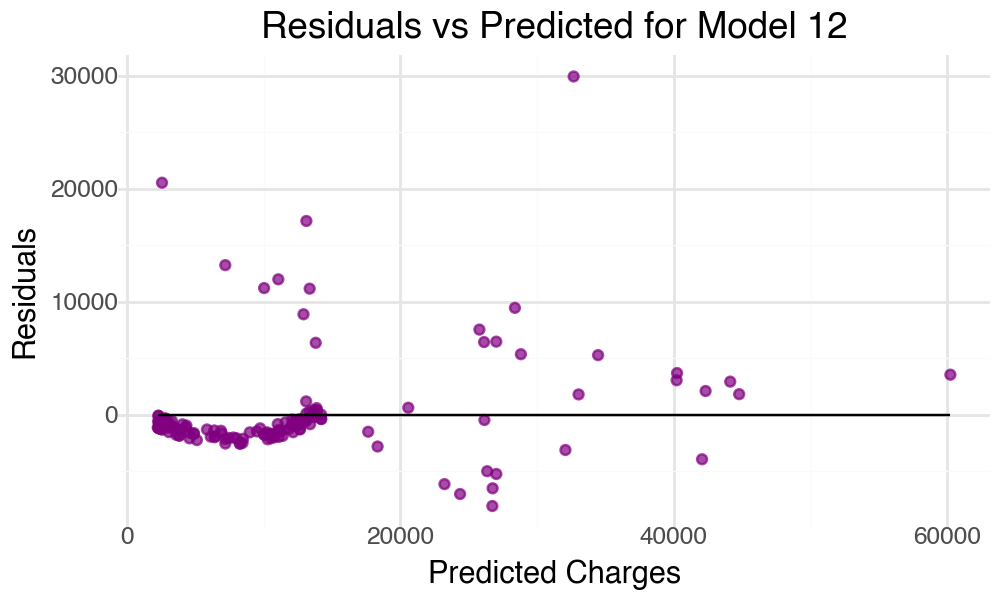

In [43]:
# residual plot 
(ggplot(test,
  aes(x = "y_preds",
      y = "residuals"
))
+ geom_point(color="purple", alpha=0.7)
+ geom_line(aes(y='0 '))
+theme_minimal()
+ labs(x = "Predicted Charges", y = "Residuals", title = "Residuals vs Predicted for Model 12")
+theme(figure_size=(5, 3))
)
# *used chat GPT to understand what a residual plot was 

# 5:Part Five: Full Exploration
Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [44]:
#New models

#column 
ct13 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker", "BMI_Smoker",  "yes_smoker", "female"]),
  ],
  remainder = "drop"
)

#create pipeline 13
pipeline13 = Pipeline ([
     ("preprocessing", ct13),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model13 = pipeline13.fit(X_train, y_train)
ytest_pred_13 = fitted_model13.predict(X_test)

mse_13 = mean_squared_error(y_test, ytest_pred_13)
r2_13 = r2_score(y_test, ytest_pred_13)


print("The MSE is",mse_13)
print("The R squared is",r2_13)

The MSE is 21985171.215240058
The R squared is 0.8582057736575224
The MSE is 21985171.215240058
The R squared is 0.8582057736575224


Adding female into the plot actally brings the rsquared down.

In [45]:
#New models: 2



ct14 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker",'BMI_Smoker', "yes_smoker", "female"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline14 = Pipeline ([
     ("preprocessing", ct14),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
fitted_model14 = pipeline14.fit(X_train, y_train)
ytest_pred_14 = fitted_model14.predict(X_test)

mse_14 = mean_squared_error(y_test, ytest_pred_14)
r2_14 = r2_score(y_test, ytest_pred_14)


print("The MSE is",mse_14)
print("The R squared is",r2_14)

The MSE is 35579489.432078674
The R squared is 0.77052868370728
The MSE is 35579489.432078674
The R squared is 0.77052868370728


Taking out the interaction variable between age and bmi lead to an 8% decrease in r squared. 

In [48]:
#New models: 3

#add poly nom to age
ct15 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker",'BMI_Smoker', "yes_smoker", "female"]),
    ("poly_age", PolynomialFeatures(2), ["age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline15 = Pipeline ([
     ("standardize", ct15),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model15 = pipeline15.fit(X_train, y_train)
ytest_pred_15 = fitted_model15.predict(X_test)

mse_15 = mean_squared_error(y_test, ytest_pred_15)
r2_15 = r2_score(y_test, ytest_pred_15)


print("The MSE is",mse_15)
print("The R squared is",r2_15)

The MSE is 21889452.353405185
The R squared is 0.8588231162211704
The MSE is 21889452.353405185
The R squared is 0.8588231162211704


In [54]:
#New models: 4

#add poly nom to age to 3
ct16 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker",'BMI_Smoker', "yes_smoker", "female"]),
    ("poly_age", PolynomialFeatures(3), ["age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline16 = Pipeline ([
     ("standardize", ct16),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model16 = pipeline16.fit(X_train, y_train)
ytest_pred_16 = fitted_model16.predict(X_test)

mse_16 = mean_squared_error(y_test, ytest_pred_16)
r2_16 = r2_score(y_test, ytest_pred_16)


print("The MSE is",mse_16)
print("The R squared is",r2_16)

The MSE is 21711953.82723801
The R squared is 0.8599678999460003
The MSE is 21711953.82723801
The R squared is 0.8599678999460003


Adding a degree to polynmial (2-->3) for age brought r squared up.

In [55]:
#New models: 5

#add poly nom to age to 3
ct17 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker",'BMI_Smoker', "yes_smoker", "female"]),
    ("poly_age", PolynomialFeatures(4), ["age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline17 = Pipeline ([
     ("standardize", ct17),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model17 = pipeline17.fit(X_train, y_train)
ytest_pred_17 = fitted_model17.predict(X_test)

mse_17 = mean_squared_error(y_test, ytest_pred_17)
r2_17 = r2_score(y_test, ytest_pred_17)


print("The MSE is",mse_17)
print("The R squared is",r2_17)

The MSE is 21772816.45726496
The R squared is 0.8595753640201551
The MSE is 21772816.45726496
The R squared is 0.8595753640201551


Adding another degree from 3--> bright r squared down. I will add a new polynomial variable. 

In [56]:
#New models: 6
#add poly nom to age and bmi 
ct18= ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker",'BMI_Smoker', "yes_smoker", "female"]),
    ("poly_age", PolynomialFeatures(3), ["age"]),
    ("poly_bmi", PolynomialFeatures(2), ["bmi"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline18 = Pipeline ([
     ("standardize", ct18),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model18 = pipeline18.fit(X_train, y_train)
ytest_pred_18 = fitted_model18.predict(X_test)

mse_18 = mean_squared_error(y_test, ytest_pred_18)
r2_18= r2_score(y_test, ytest_pred_18)


print("The MSE is",mse_18)
print("The R squared is",r2_18)

The MSE is 21517172.197879523
The R squared is 0.8612241517245385
The MSE is 21517172.197879523
The R squared is 0.8612241517245385


This has been the highest r squared so far.

In [60]:
#New models: 6
#add poly nom to age and bmi--> 3
ct19= ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", "Age_Smoker",'BMI_Smoker', "yes_smoker", "female"]),
    ("poly_age", PolynomialFeatures(3), ["age"]),
    ("poly_bmi", PolynomialFeatures(3), ["bmi"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline19 = Pipeline ([
     ("standardize", ct19),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model19 = pipeline19.fit(X_train, y_train)
ytest_pred_19 = fitted_model19.predict(X_test)

mse_19 = mean_squared_error(y_test, ytest_pred_19)
r2_19= r2_score(y_test, ytest_pred_19)


print("The MSE is",mse_19)
print("The R squared is",r2_19)

The MSE is 22744172.020542283
The R squared is 0.8533105681152274
The MSE is 22744172.020542283
The R squared is 0.8533105681152274


Adding a degree (2-3) brought down the rsquared. 

**Model 18 was the best predictor becuase it has an rsquared fo .86122